In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
from dateutil import parser

from manofunkcijos import *

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [ ]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""

"""
C.execute(sql)
ans = C.fetchall()
kodas, alga14, prof14 = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)


In [ ]:
# 1) su plot() nubraižykite BrentOilPrices istorinius duomenis.
# Duomenis imkite iš SQL lentelės BrentOilPrices.
# 2) Pridėkite vartotojo įvestį, kad su input() būtų galima nurodyti metus (nuo, iki),
# kurių istorinius duomenis norite pamatyti.

Rodoma 5 eilutės iš 8360
| 0 |   20-May-87    |     18.63      |
| 1 |   21-May-87    |     18.45      |
| 2 |   22-May-87    |     18.55      |
| 3 |   25-May-87    |      18.6      |
| 4 |   26-May-87    |     18.63      |


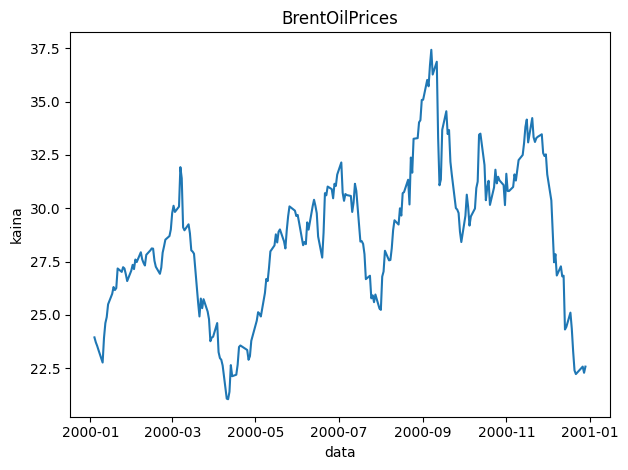

In [19]:

sql="""
select * from BrentOilPrices;
"""
C.execute(sql)
ans = C.fetchall()
data, kaina = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

for i in range(len(data)):
    data[i] = parser.parse(data[i]).date()

nuo = str(input('nuo?'))
iki = str(input('iki?'))

nuo2 = parser.parse(nuo).date()
iki2 = parser.parse(iki).date()

data_new = []
kaina_new = []
for i, j in zip(data, kaina):
    if nuo2 <= i <= iki2:
        data_new.append(i)
        kaina_new.append(j)
        
        


fig, axis = plt.subplots()

axis.plot(data_new, kaina_new)
axis.set_xlabel('data')
# axis.tick_params(axis='x', rotation=90)
axis.set_ylabel('kaina')
plt.title('BrentOilPrices')
fig.tight_layout()
plt.show()

In [11]:
print(parser.parse('1992/12/12').date())

1992-12-12


Rodoma 5 eilutės iš 1510
| 0 |    4-Jan-10    |     79.05      |   2010-01-04   |
| 1 |    5-Jan-10    |     79.27      |   2010-01-05   |
| 2 |    6-Jan-10    |     80.14      |   2010-01-06   |
| 3 |    7-Jan-10    |     80.57      |   2010-01-07   |
| 4 |    8-Jan-10    |     80.06      |   2010-01-08   |


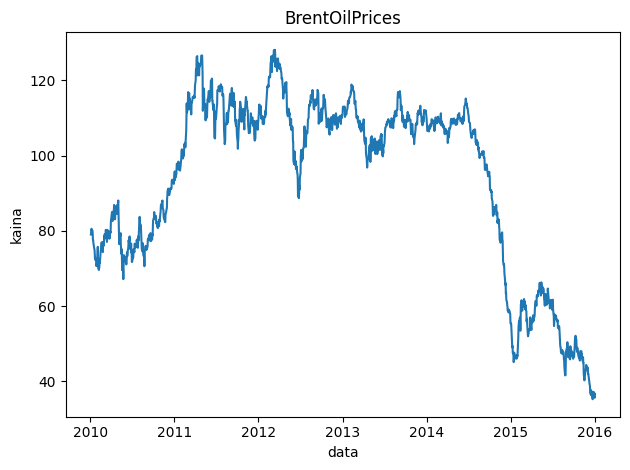

In [5]:

#sql užklausos vykdymas per mysql/mariadb kursorių
nuo= parser.parse(input('nuo?'))
iki = parser.parse(input('Iki?'))
sql="""select Date, Price, str_to_date(Date, '%d-%b-%y')
as DATA
from BrentOilPrices
where str_to_date(Date, '%d-%b-%y')
between %s and %s;"""
C.execute(sql, (nuo, iki))
ans = C.fetchall()
n, kaina, data= list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)



fig, axis = plt.subplots()

axis.plot(data, kaina)
axis.set_xlabel('data')
# axis.tick_params(axis='x', rotation=90)
axis.set_ylabel('kaina')
plt.title('BrentOilPrices')
fig.tight_layout()
plt.show()

Rodoma 5 eilutės iš 12
| 0 |       1        |      1737      |
| 1 |       2        |      1510      |
| 2 |       3        |      1608      |
| 3 |       4        |      1615      |
| 4 |       5        |      2166      |


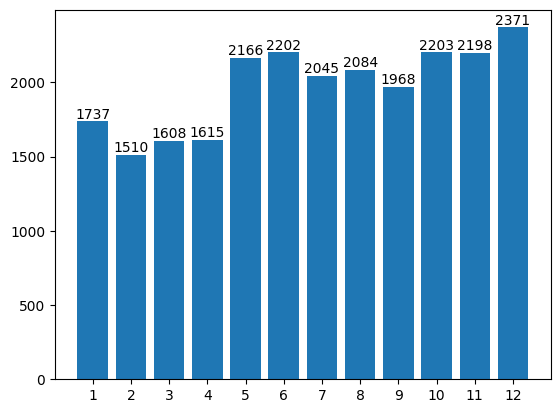

In [35]:
# EismoĮvykiai - kurį mėnesį įvyko daugiausiai eismo įvykių?
# Pateikite eismo įvykių kiekius su bar arba barh.

# kuriomis valandomis? Taip pat vizuallizuokite tai su bar arba barh. Stulpelis dataLaikas.

sql="""
select month(cast(dataLaikas as date)) as menuo, count(*) as kiekis
from EismIvyk2021
group by menuo;
"""
C.execute(sql)
ans = C.fetchall()
menuo, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots()

B = axis.bar(menuo, kiekis)
axis.set_xticks(menuo)
axis.bar_label(B)

plt.tight_layout
plt.show()

Rodoma 5 eilutės iš 24
| 0 |       0        |      467       |
| 1 |       1        |      263       |
| 2 |       2        |      215       |
| 3 |       3        |      183       |
| 4 |       4        |      218       |


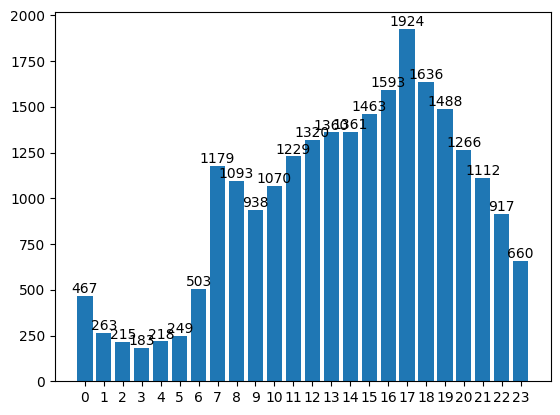

In [33]:
sql="""
select hour(cast(dataLaikas as datetime)) as valanda, count(*) as kiekis
from EismIvyk2021
group by valanda;
"""
C.execute(sql)
ans = C.fetchall()
valanda, kiekis = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

fig, axis = plt.subplots()

B = axis.bar(valanda, kiekis)
axis.set_xticks(valanda)
axis.bar_label(B)

plt.tight_layout
plt.show()

Rodoma 5 eilutės iš 6
| 0 |Klaipėda, Taikos|       41       |     0.1729     |
| 1 |Vilnius, Ozo 25 |       40       |     0.1687     |
| 2 |Vilnius, Geležin|       40       |     0.1687     |
| 3 |Kaunas, Islandij|       39       |     0.1645     |
| 4 |Kaunas, Karaliau|       31       |     0.1308     |


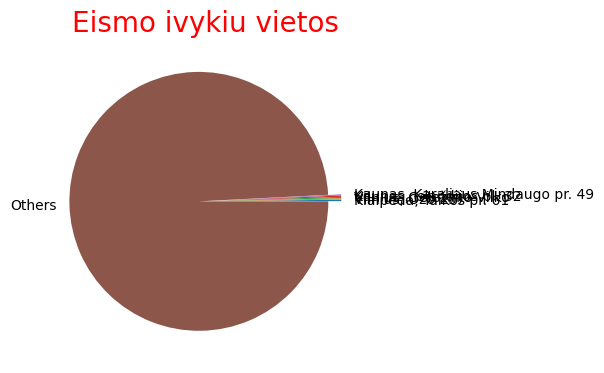

In [42]:
# kokie top 5 adrresai, kuriuose yra daugiausiai eimso įvykių?
# kiek procentų nuo visų įvykių įvyko šiuose 5kiuose adresuose?
#procentinę vizulizaciją pateikite su pie plot.

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select *, C/(select count(*) from EismIvyk2021)*100 as '%' from
(select * from
(select ivykioVieta as vieta, count(*) as C
from EismIvyk2021
group by ivykioVieta
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from EismIvyk2021
where ivykioVieta not in
(select vieta from (select ivykioVieta as vieta, count(*) as C
from EismIvyk2021
group by ivykioVieta
order by C desc
limit 5) as T2)) as T3;
"""
C.execute(sql)
ans = C.fetchall()
vieta, kiekiai, dalis = list(map(list, zip(*ans)))

pout(ans)

e = [0.1, 0, 0.1 ,0, 0.1, 0]

fig, axis = plt.subplots(figsize=(6,6))

axis.pie(dalis, 
        labels=vieta, 
        # autopct='%.2f proc.',
        # textprops={'fontsize':10, 'color': 'black'},
        # startangle=90,
        # move the percentage inside the arcs
        pctdistance=1.5,
        # add spaces between the arcs
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05,]
        )

# hole
# hole = plt.Circle((0, 0), 0.65, facecolor='white')
# plt.gcf().gca().add_artist(hole)

plt.title('Eismo ivykiu vietos', fontsize=20, color='red')
plt.tight_layout()
plt.show()


| 0 |    BROOKLYN    |      9826      |
| 1 |     BRONX      |      6794      |
| 2 |     QUEENS     |      3568      |
| 3 |   MANHATTAN    |      2974      |
| 4 | STATEN ISLAND  |      703       |


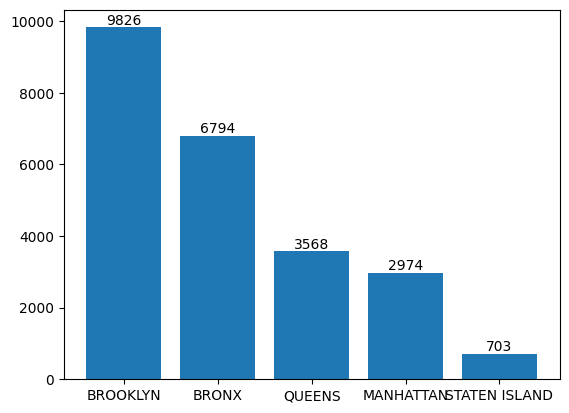

In [46]:
# Suraskite, kuriuose rajonuose įvyksta daugiausiai susišaudymų? Vizualizuokite.
# suraskite, kuriomis valandomis įvyksta daugiausiai susišaudymų? Vizualizuokite.
# Kuriomis valandomis (procentiškai) įvyksta daugiausiai mirtinų susišaudymų? Vizualizuokite.

# nypd lentelė
# BORO
# OCCUR_time
# STATISTICAL_MURDER_FALG jei 1, tai mirtinas įvykis

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select BORO as rajonas, count(*) as kiekis
from nypd
group by rajonas
order by kiekis desc;
"""
C.execute(sql)
ans = C.fetchall()
rajonas, kiekis = list(map(list, zip(*ans)))

pout(ans)


fig, axis = plt.subplots()

B = axis.bar(rajonas, kiekis)
axis.bar_label(B)

fig.tight_layout
plt.show()

Rodoma 5 eilutės iš 24
| 0 |       0        |      1928      |
| 1 |       1        |      1877      |
| 2 |       2        |      1635      |
| 3 |       3        |      1468      |
| 4 |       4        |      1301      |


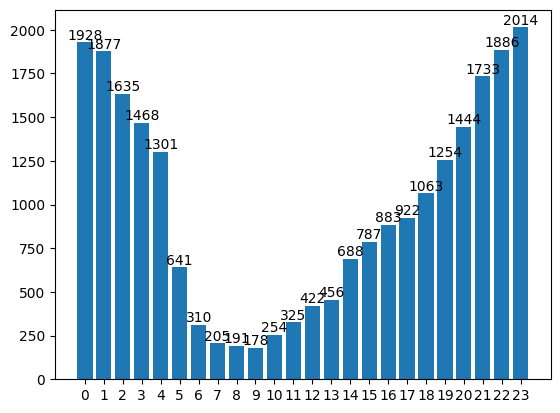

In [48]:
# suraskite, kuriomis valandomis įvyksta daugiausiai susišaudymų? Vizualizuokite.

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select hour(OCCUR_TIME) as laikas, count(*) as kiekis
from nypd
group by laikas;
"""
C.execute(sql)
ans = C.fetchall()
laikas, kiekis = list(map(list, zip(*ans)))

pout(ans)


fig, axis = plt.subplots()

B = axis.bar(laikas, kiekis)
axis.bar_label(B)
axis.set_xticks(valanda)


fig.tight_layout
plt.show()

Rodoma 5 eilutės iš 24
| 0 |       0        |      329       |
| 1 |       1        |      328       |
| 2 |       2        |      285       |
| 3 |       3        |      261       |
| 4 |       4        |      253       |


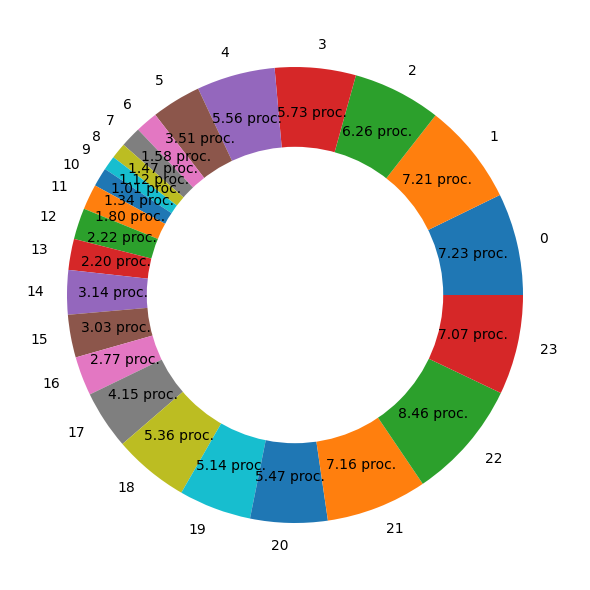

In [54]:
# Kuriomis valandomis (procentiškai) įvyksta daugiausiai mirtinų susišaudymų? Vizualizuokite.

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select hour(OCCUR_TIME) as laikas, count(*) as kiekis
from nypd
where STATISTICAL_MURDER_FLAG=1
group by laikas;
"""
C.execute(sql)
ans = C.fetchall()
valanda, kiekis= list(map(list, zip(*ans)))

pout(ans)

# e = [0.1, 0, 0.1 ,0, 0.1, 0]

fig, axis = plt.subplots(figsize=(6,6))

axis.pie(kiekis, 
        labels=valanda, 
        autopct='%.2f proc.',
        # textprops={'fontsize':10, 'color': 'black'},
        # startangle=90,
        # move the percentage inside the arcs
        pctdistance=0.8,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )

# hole
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

# plt.title('Eismo ivykiu vietos', fontsize=20, color='red')
plt.tight_layout()
plt.show()


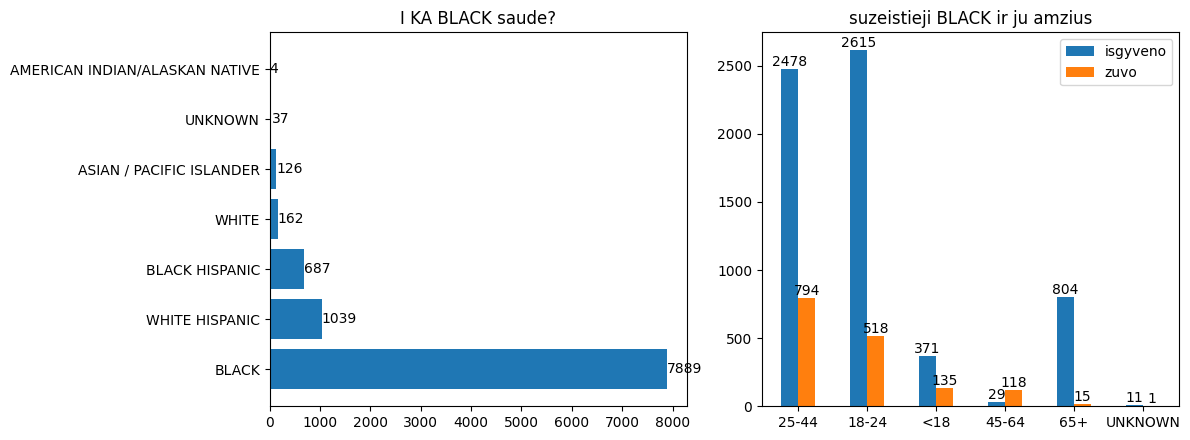

In [10]:
# turite informaciją apie užpuoliko lytį, amžiaus grupę, rasę, bei tą pačią infromaciją apie auką. 
# kokia vyraujanti aukos rasė, amžiaus grupė, lytis, užpuoliko amž grupė, rasė, lytis?
# Ar užpuolikai renkasi savo amžiaus, lyties, rasės aukas ar ne?


#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select VIC_RACE, count(*) as vicC
from nypd
where PERP_RACE='BLACK'
group by VIC_RACE
order by vicC desc;
"""
C.execute(sql)
ans = C.fetchall()
vic_rase, vic_kiekis= list(map(list, zip(*ans)))


sql="""
select VIC_AGE_GROUP, count(*) as C
from nypd
where PERP_RACE='BLACK' and VIC_RACE='BLACK' and STATISTICAL_MURDER_FLAG=0
group by VIC_AGE_GROUP
order by VIC_AGE_GROUP;
"""
C.execute(sql)
ans = C.fetchall()
vic_amzius, vicgrup_kiekis= list(map(list, zip(*ans)))


sql="""
select VIC_AGE_GROUP, count(*) as C
from nypd
where PERP_RACE='BLACK' and VIC_RACE='BLACK' and STATISTICAL_MURDER_FLAG=1
group by VIC_AGE_GROUP
order by C desc;
"""
C.execute(sql)
ans = C.fetchall()
vic_amzius, deadvicgrup_kiekis= list(map(list, zip(*ans)))



fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4.5))

B1 = ax1.barh(vic_rase, vic_kiekis)
ax1.bar_label(B1)
ax1.set_title('I KA BLACK saude?')

x = np.arange(0, len(vic_amzius))
w = 0.25

B2 = ax2.bar(x-w/2, vicgrup_kiekis, label='isgyveno', width=w)
ax2.bar_label(B2)
B3 = ax2.bar(x+w/2, deadvicgrup_kiekis, label='zuvo', width=w)
ax2.bar_label(B3)
ax2.set_title('suzeistieji BLACK ir ju amzius')

ax2.set_xticks(x)
ax2.set_xticklabels(vic_amzius)
ax2.legend(loc='best')



plt.tight_layout()
plt.show()

